In [25]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
from PIL import Image
import numpy as np
import torch

model = AutoModelForImageClassification.from_pretrained("EdBianchi/vit-fire-detection")
feature_extractor = AutoFeatureExtractor.from_pretrained("EdBianchi/vit-fire-detection")

c:\Users\ranyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [145]:
# checkpoint = "EdBianchi/vit-fire-detection"
# detector = pipeline(model=checkpoint, task="image-classification")
# img = ("optics.png")
img = Image.open("../data/line-of-fire.jpg")

inputs = feature_extractor(images=img, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits
print(logits)
predicted_class_idx = logits.argmax(-1).item()
print(predicted_class_idx)

tensor([[ 2.4472,  1.8139, -4.7434]], grad_fn=<AddmmBackward0>)
0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


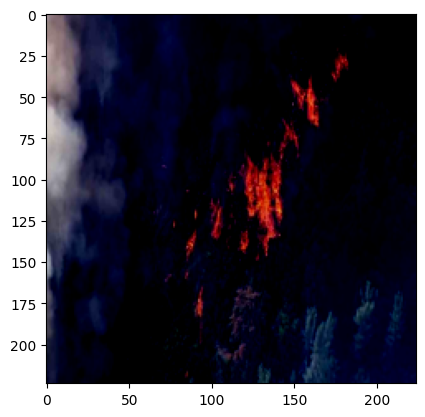

In [111]:
import matplotlib.pyplot as plt
def show_attention(img_path):
  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)

  img = Image.open(img_path)

  inputs = feature_extractor(images=img, return_tensors="pt")

  # Visualize the feature_extractor inputs
  plt.imshow(inputs.pixel_values[0].permute(1, 2, 0))
  plt.title("Processed image (input for the model)")


  # Grab attention values
  with torch.no_grad():
    out = model(**inputs, output_attentions=True)
    attentions = out.attentions


  heads = attentions[-1][0]
  print(heads.shape)

  # Get the mean attention heads across all heads
  mean_heads = torch.mean(heads, dim=0)
  mean_heads = mean_heads[:, 1:,]
  print(mean_heads.shape)

  plt.subplot(1, 2, 2)
  # Visualize CLS token attentions (14x14)
  plt.imshow(mean_heads[0].reshape(14, 14).numpy(), cmap='hot', interpolation='nearest')
  plt.title("Self-Attention Map of CLS token (What the model sees as important)")

  return out.logits.argmax(-1).item()

In [127]:
id2label = {0: "fire", 1: "no_fire", 2: "smoke"}

(0.0, 1.0)

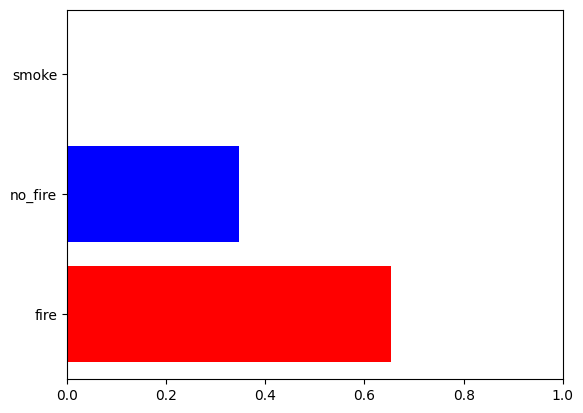

In [150]:
# Probabilities for both classes: fire and no_fire
plt.barh(list(id2label.values()), outputs.logits.softmax(-1).squeeze().detach().numpy()[:2], color=["red", "blue", "blue"])
plt.xlim([0, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([12, 197, 197])
torch.Size([197, 196])


'fire'

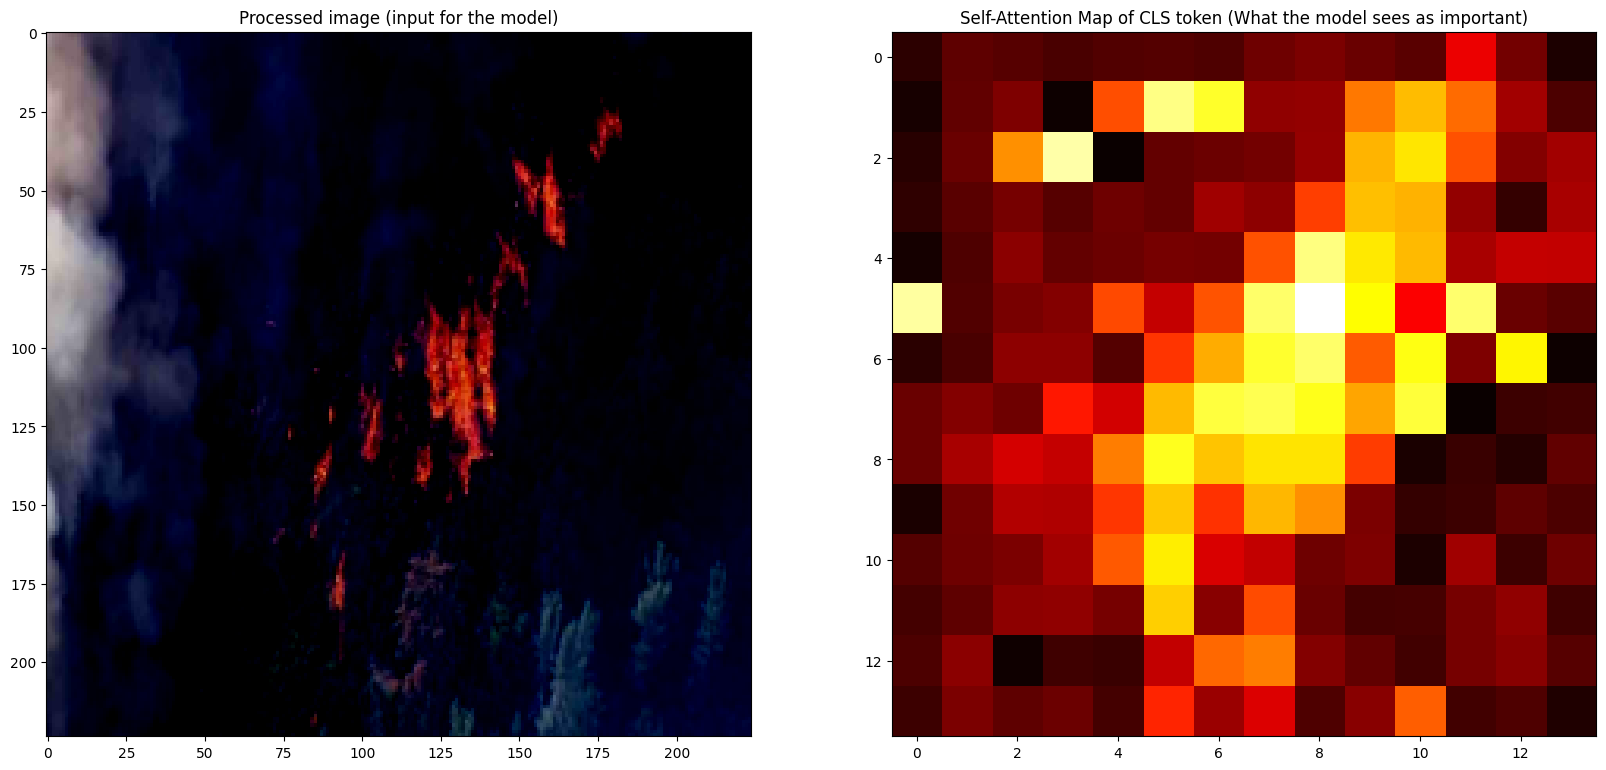

In [113]:
id2label[show_attention("../data/fire.jpg")]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([12, 197, 197])
torch.Size([197, 196])


'no_fire'

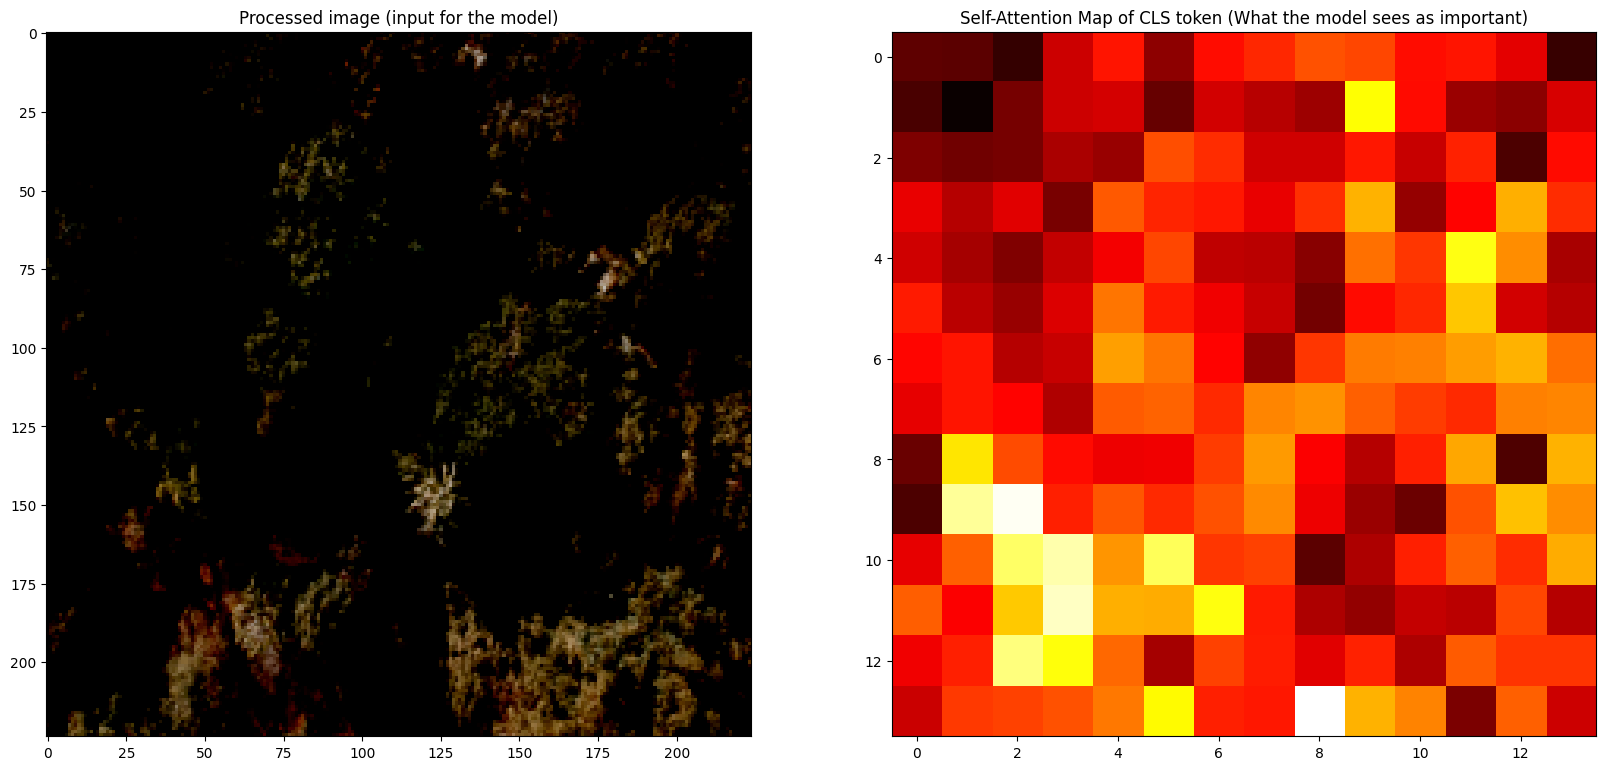

In [114]:
id2label[show_attention("../data/no-fire.jpg")]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([12, 197, 197])
torch.Size([197, 196])


'fire'

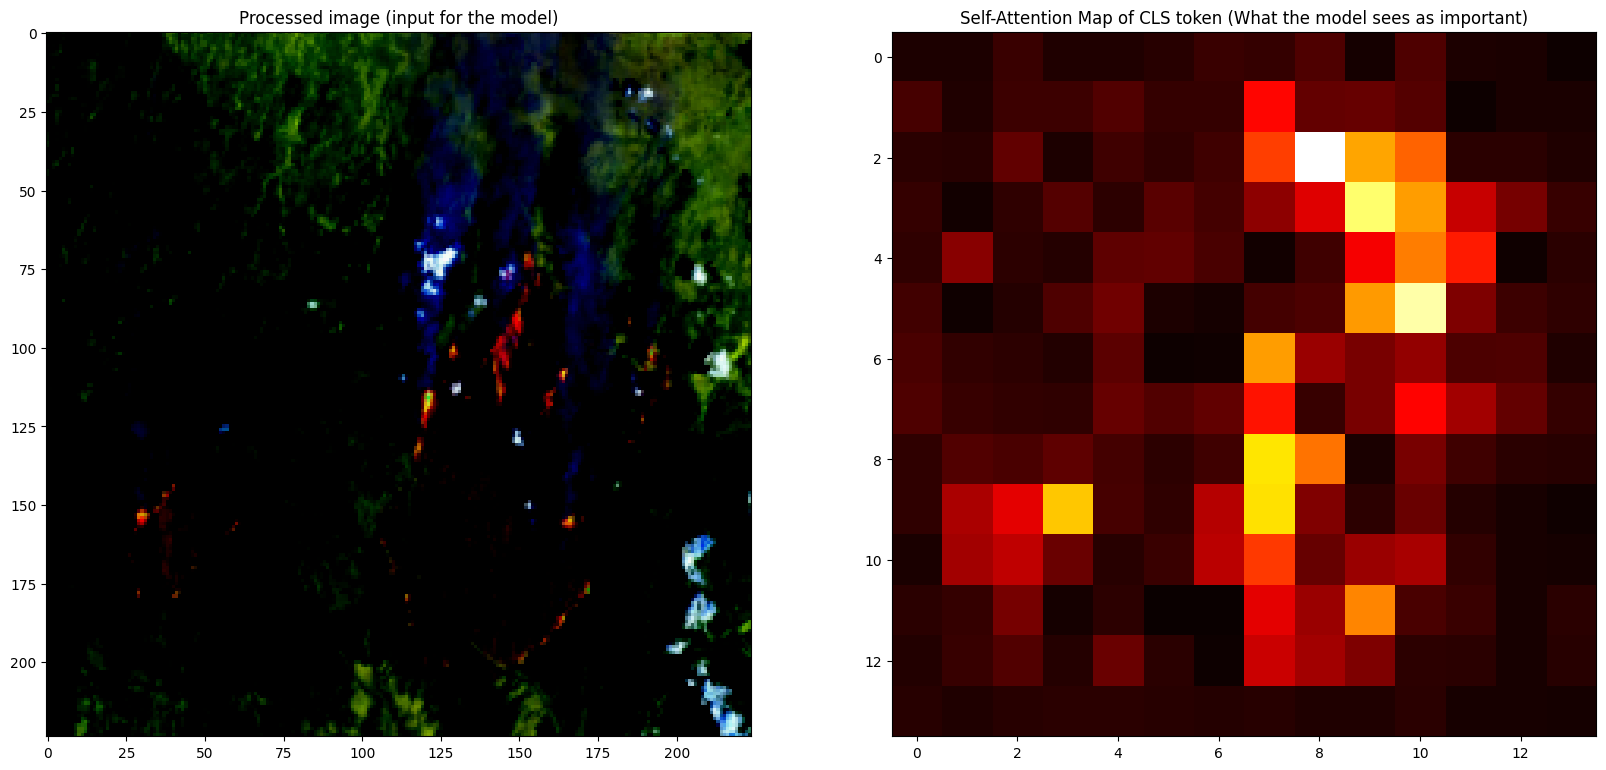

In [115]:
id2label[show_attention("optics.png")]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([12, 197, 197])
torch.Size([197, 196])


'no_fire'

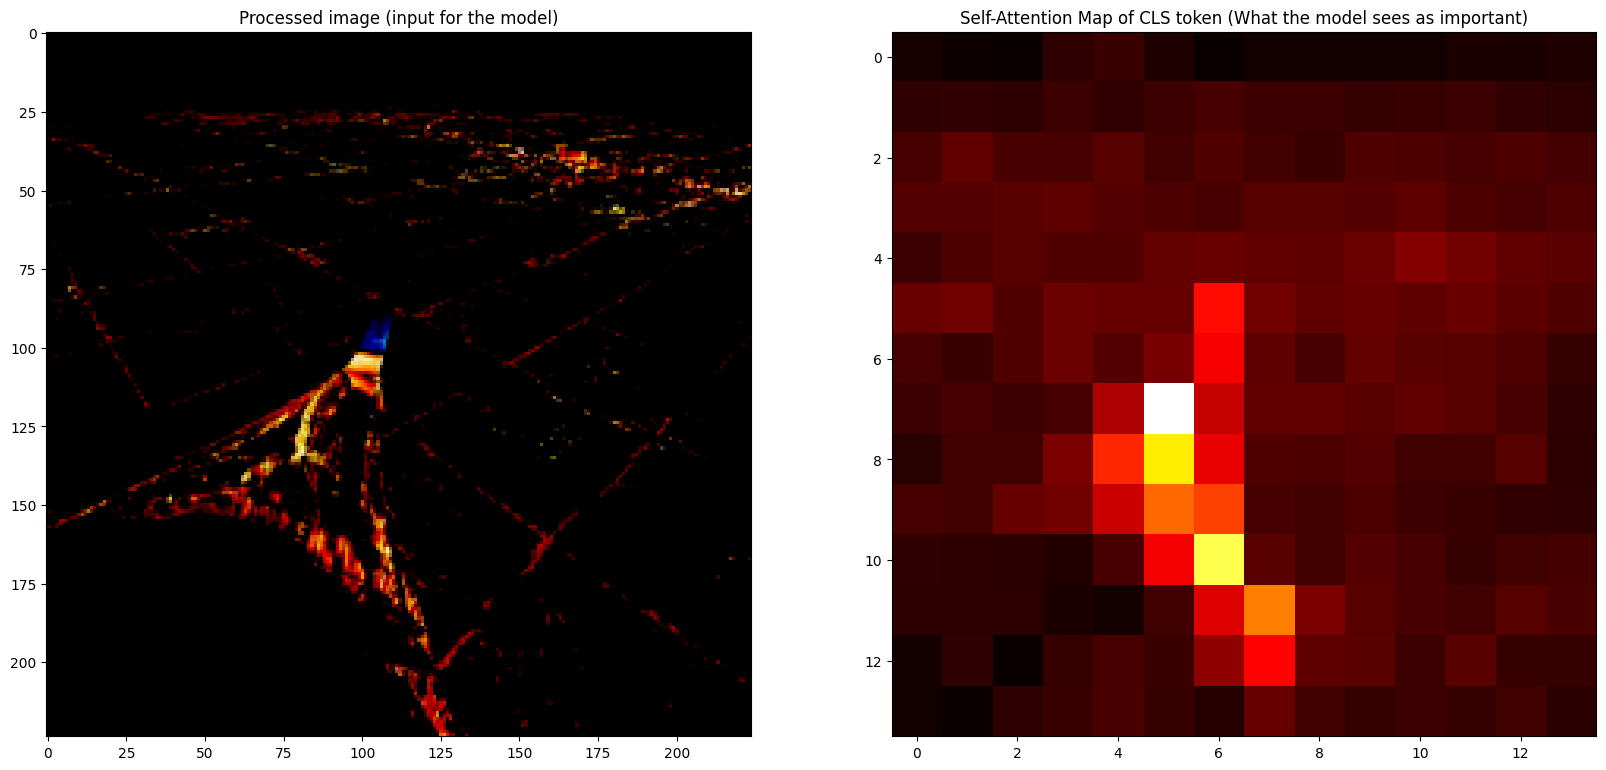

In [140]:
id2label[show_attention("../data/las-vegas-nightsky.jpg")]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([12, 197, 197])
torch.Size([197, 196])


'no_fire'

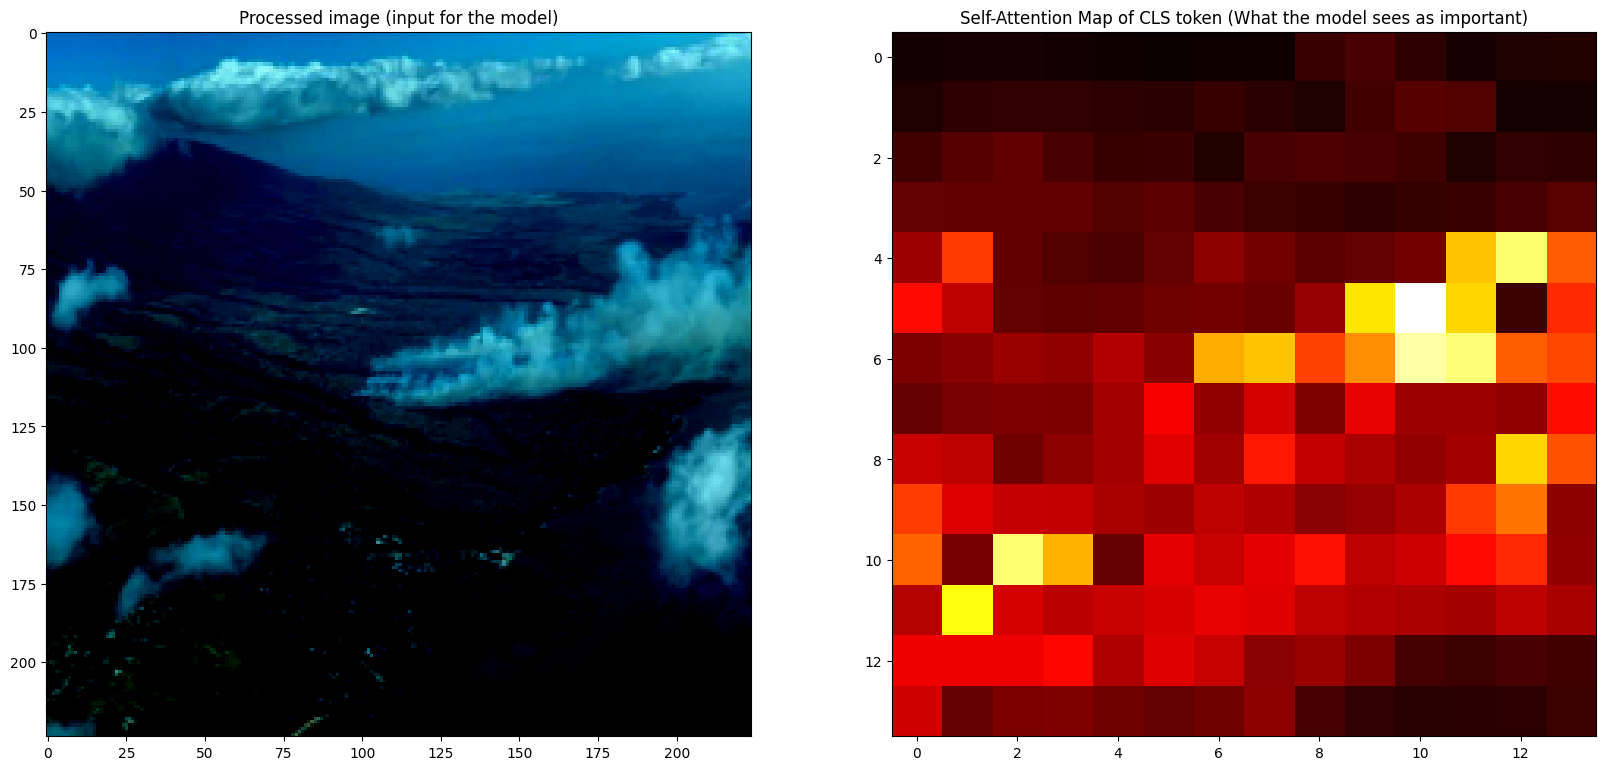

In [117]:
id2label[show_attention("../data/maui-23.jpg")]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([12, 197, 197])
torch.Size([197, 196])


'fire'

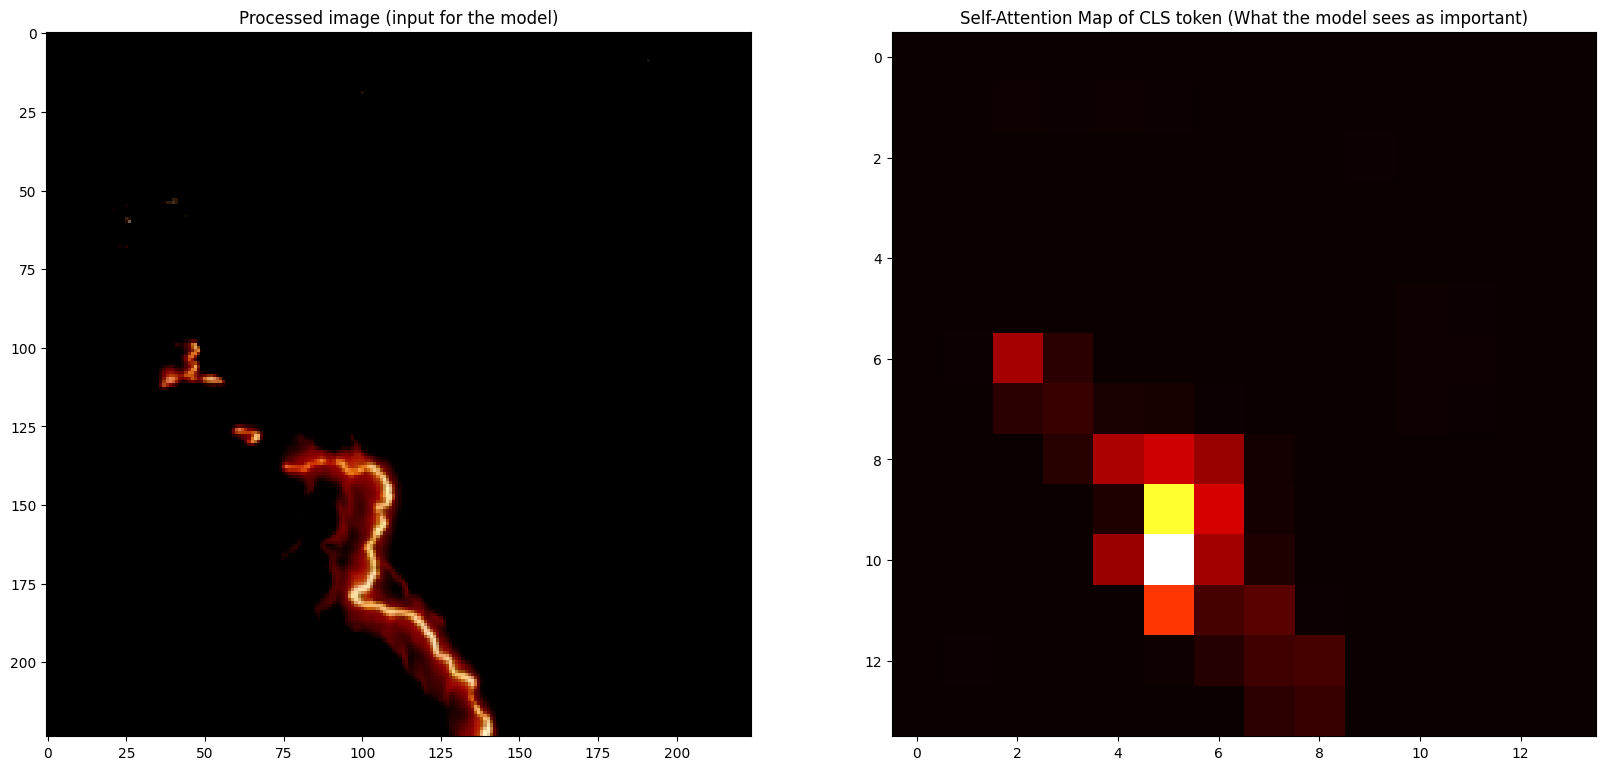

In [118]:
id2label[show_attention("../data/line-of-fire.jpg")]